# Background


This is basically the same as V03 but now you can easier to following

I found the database here:
 - [NeuroMouse Project](http://phm.utoronto.ca/~jeffh/surgical.htm)
 - [Back to Mouse Atlas Variational Mouse Brain Atlas](http://localhost:8888/notebooks/notebooks/Segmentation/Dataset%20-%20Mouse%20Brain%20and%20Labels%20V02.ipynb) This is the other toronto based atlas.  hopefully the labels here are accurate.
 

# Imports

In [1]:
import nibabel as nib  
import numpy
import matplotlib.pyplot as plt
%pylab inline
from IPython.display import Image

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.misc
from skimage import measure

In [3]:
# for this module the stl is now depricated
# pip install numpy-stl
from stl import mesh

In [4]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Functions

In [5]:
def loadMNC(filepath):
    img = nib.load(filepath)
    data = img.get_data()
    return data

In [6]:
def showSlice(data):
    plt.set_cmap("gray")
    plt.imshow(data)

In [7]:
def getLabelInfo(labelArray,index):
    try:
        print(labelArray[index])
    except:
        print("{} is too large the there are only {} labels including 0 index".format(index,len(labelArray)-1))
    

In [8]:
def make_mesh(image, threshold=-300, step_size=1):
    print "Transposing surface"
    p = image.transpose(2,1,0)
    
    print "Calculating surface"
    try:
        verts, faces = measure.marching_cubes(p, threshold) 
    except:
        verts, faces = measure.marching_cubes_classic(p, threshold)         
    return verts, faces

# Parameters

In [9]:
# Directory locations
pathBrain = "C://Cerebral//_MarioSandBox//DB//medicalHolography//Animal Brains//UofTLabeledData//129SV_atlas.mnc"
pathLabels = "C://Cerebral//_MarioSandBox//DB//medicalHolography//Animal Brains//UofTLabeledData//129SV_atlas_labelling.mnc"
pathLabelInfo = "C://Cerebral//_MarioSandBox//DB//medicalHolography//Animal Brains//UofTLabeledData//129SV_atlas_labelling_names.txt"

In [10]:
areaInd = 3 # Use the text file "129SV_atlas_labelling_names.txt" to select the approriate area you want to create an STL of 
outDir = 'C://Cerebral//_MarioSandBox//DB//medicalHolography//Animal Brains//UofTLabeledData//Segmented//'

# Reading File

Read the label informaiton and place it in an array for easy viewing later

In [11]:
labelInfo = []

f = open(pathLabelInfo, "r") 
for line in f: 
    labelInfo.append(line)
#     print line 

In [12]:
getLabelInfo(labelInfo,areaInd-1)

3 brain_stem



There are some nodes that do not have labels so keep track of these as well just in case

In [13]:
dataBrain = loadMNC(pathBrain)
dataLabels = loadMNC(pathLabels)

# Segmentation

Crude segmentation when we have the labels:
1. Obtain label slice and data slice
2. create mask of the label
3. multiply mask and data
4. store new masked data
5. repeat for all slices

- dataBrain = variable containing the data
- dataLabels = varible containg the labels

In [14]:
numSlice,xdim,ydim = dataBrain.shape
dataBrainSegmented = np.zeros(dataBrain.shape)

for sliceInd in xrange(numSlice):
    print('Now applying mask to slice {}'.format(sliceInd))
    # looping paramters
    # this will be the cerebellum
    # sliceInd = 80

    # obtain working slice
    currentDataSlice = np.copy(dataBrain[sliceInd,:,:])
    currentLabelSlice = np.copy(dataLabels[sliceInd,:,:])

    # create the masks
    currentLabelSlice[np.where(currentLabelSlice!=areaInd)] = 0
    currentLabelSlice[np.where(currentLabelSlice==areaInd)] = 1

    # apply mask
    maskedData = currentLabelSlice * currentDataSlice

    # store mask in the volumetric data
    dataBrainSegmented[sliceInd,:,:] = maskedData
    
    # Save images    
    #     scipy.misc.imsave(outDir+'{}.jpg'.format(sliceInd), maskedData)
    # we are not doing this... we want to save them in an stl file instead of a stack of images

Now applying mask to slice 0
Now applying mask to slice 1
Now applying mask to slice 2
Now applying mask to slice 3
Now applying mask to slice 4
Now applying mask to slice 5
Now applying mask to slice 6
Now applying mask to slice 7
Now applying mask to slice 8
Now applying mask to slice 9
Now applying mask to slice 10
Now applying mask to slice 11
Now applying mask to slice 12
Now applying mask to slice 13
Now applying mask to slice 14
Now applying mask to slice 15
Now applying mask to slice 16
Now applying mask to slice 17
Now applying mask to slice 18
Now applying mask to slice 19
Now applying mask to slice 20
Now applying mask to slice 21
Now applying mask to slice 22
Now applying mask to slice 23
Now applying mask to slice 24
Now applying mask to slice 25
Now applying mask to slice 26
Now applying mask to slice 27
Now applying mask to slice 28
Now applying mask to slice 29
Now applying mask to slice 30
Now applying mask to slice 31
Now applying mask to slice 32
Now applying mask to

Text(0.5,1,'Segmented MR Scan')

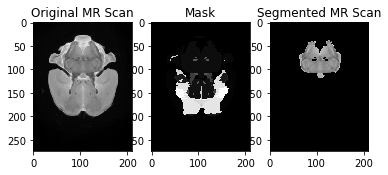

In [22]:
sliceIndOfinterest = 50

plt.subplot(1,3,1)
showSlice(dataBrain[sliceIndOfinterest,:,:])
plt.title('Original MR Scan')
plt.subplot(1,3,2)
showSlice(dataLabels[sliceIndOfinterest,:,:])
plt.title('Mask')
plt.subplot(1,3,3)
showSlice(dataBrainSegmented[sliceIndOfinterest,:,:])
plt.title('Segmented MR Scan')

The above image shows the progression of segmentation

# STL Generation

In [16]:
v, f = make_mesh(dataBrainSegmented,0.0)

Transposing surface
Calculating surface


In [17]:
veins = mesh.Mesh(np.zeros(f.shape[0], dtype=mesh.Mesh.dtype))

In [18]:
for i, f in enumerate(f):
    for j in range(3):
        veins.vectors[i][j] = v[f[j],:]

In [19]:
outSTLDir = 'C://Cerebral//_MarioSandBox//DB//medicalHolography//Animal Brains//UofTLabeledData//Segmented//'
veins.save(outSTLDir+labelInfo[areaInd-1].split()[1]+'.stl')